# 6.1 Open Source Data

## Contents:

### 01. Importing Libraries

### 02. Importing Citi Bikes Data Set

### 03. Checking for Duplicates

### 04. Imputing Missing Values with the Median and Flagging Them

### 05. Checking for Misisng Values 

### 06. Checking for Mixed-Type Data

### 07. Understanding My Data

### 08. Checking for Outliers

### 09. Export Data as .pkl

#### 01. Importing Libraries

In [248]:
# Importing libraries
import pandas as pd
import numpy as np
import os

#### 02. Importing Citi Bikes Data Set

In [249]:
# Importing Citi Bikes Data Set 
# Dataframe
df = pd.read_csv(r'/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6/6.1_Data_Set.csv', index_col = False)

In [250]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,2.0
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,1.0
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,1.0
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,2.0
4,VGBsb5,18024.0,Sat,18.0,07/09/2013 18:08,521.0,8 Ave & W 31 St,40.750450,-73.994810,07/09/2013 18:46,476.0,E 31 St & 3 Ave,40.743943,-73.979661,2296.0,Non-Subscriber,NaN,0.0


In [251]:
# Check shape
df.shape

(50002, 18)

#### 03. Checking for Duplicates

In [252]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Display the duplicate rows (optional)
duplicate_rows.head()

Number of duplicate rows: 0


,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender


#### 04. Imputing Missing Values with the Median and Flagging Them

In [253]:
# Identifying missing columns
df['birth_year'].value_counts(dropna = False)

birth_year
NaN       6980
1985.0    1837
1981.0    1830
1982.0    1810
1984.0    1798
          ... 
1917.0       1
1926.0       1
1924.0       1
1921.0       1
6979.0       1
Name: count, Length: 78, dtype: int64

In [254]:
# Step 1: Create a flag for missing birth years
df['birth_year_missing'] = df['birth_year'].isna()

# Step 2: Calculate median birth year (excluding NaN)
median_birth_year = df['birth_year'].median()

# Step 3: Fill missing birth years with the median
df['birth_year'] = df['birth_year'].fillna(median_birth_year)

##### Although this can introduce bias, it is the best option for my data set considering I might need age-related trends for future analysis. Also, I want to retain most of the data → dropping 14% might be too much. Imputing with the median is a safe, common practice that avoids skewing the data as much as using the mean.

In [255]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,2.0,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,1.0,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,1.0,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,2.0,False
4,VGBsb5,18024.0,Sat,18.0,07/09/2013 18:08,521.0,8 Ave & W 31 St,40.750450,-73.994810,07/09/2013 18:46,476.0,E 31 St & 3 Ave,40.743943,-73.979661,2296.0,Non-Subscriber,1978.0,0.0,True


In [256]:
# Check Shape 
df.shape

(50002, 19)

#### 05. Checking for Missing Values 

In [257]:
# Step 1: Replace 0 with NaN
df['gender'] = df['gender'].replace(0, np.nan)

# Step 2: Check how many NaN entries there are now
missing_gender_count = df['gender'].isna().sum()
print(f"Missing gender entries: {missing_gender_count}")

Missing gender entries: 6982


In [258]:
# Step 3: Map numeric values to meaningful labels and convert to categorical type
df['gender'] = df['gender'].map({1: 'male', 2: 'female'})
df['gender'] = df['gender'].astype('category')

#####  For now, I will keep the NaNs, I will not drop or impute for now. I may require gender-related analysis later. If I drop the rows, I will lose a significant portion of my data (14%), and those trips might still be useful for non-gender-based insights (e.g. time of day, duration, station trends). If I impute gender, I will introduce bias and possibly distort gender distribution. Gender is categorical, so median/mode imputation isn't reliable here. Instead, I will filter when needed, e.g. I will exclude the NaN entries in my queries or visualisations.

In [259]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
4,VGBsb5,18024.0,Sat,18.0,07/09/2013 18:08,521.0,8 Ave & W 31 St,40.750450,-73.994810,07/09/2013 18:46,476.0,E 31 St & 3 Ave,40.743943,-73.979661,2296.0,Non-Subscriber,1978.0,NaN,True


In [260]:
# Check shape
df.shape

(50002, 19)

In [261]:
# Check the data type of the 'gender' column
print(df['gender'].dtype)

category


#### 06. Checking for Mixed-Type Data

In [262]:
# Review Variables and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   trip_id                  50000 non-null  object  
 1   bike_id                  50000 non-null  float64 
 2   weekday                  50000 non-null  object  
 3   start_hour               50000 non-null  float64 
 4   start_time               50000 non-null  object  
 5   start_station_id         50000 non-null  float64 
 6   start_station_name       50000 non-null  object  
 7   start_station_latitude   50000 non-null  float64 
 8   start_station_longitude  50000 non-null  float64 
 9   end_time                 50000 non-null  object  
 10  end_station_id           50000 non-null  float64 
 11  end_station_name         50000 non-null  object  
 12  end_station_latitude     50000 non-null  float64 
 13  end_station_longitude    50000 non-null  float64 
 14  trip_d

##### Since I imputed misisng values in the birth_year column and filtered the gender column, I solved the issue of mixed-data types.

#### 07. Understanding my Data

In [263]:
# Review column names 
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'birth_year_missing'],
      dtype='object')

In [264]:
# Descriptive statistics for numeric columns
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50002.000000
mean,17615.269360,14.145240,443.321500,40.734170,-73.991109,442.539700,40.733859,-73.991351,838.982900,1976.058998
std,1675.407446,4.860541,356.559925,0.019911,0.012555,355.756022,0.019885,0.012569,573.663997,24.638629
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000
25%,16188.000000,10.000000,304.000000,40.720196,-74.000271,304.000000,40.720196,-74.001547,417.000000,1970.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000
75%,19014.000000,18.000000,484.000000,40.750020,-73.981923,483.000000,40.749013,-73.982050,1112.000000,1983.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,6979.000000


##### Outliers have been detected in the trip_duration column. The minimum is 60 s, the maxiumum is 2697 s, and the mean is 839 s.

#### 08. Checking for Outliers

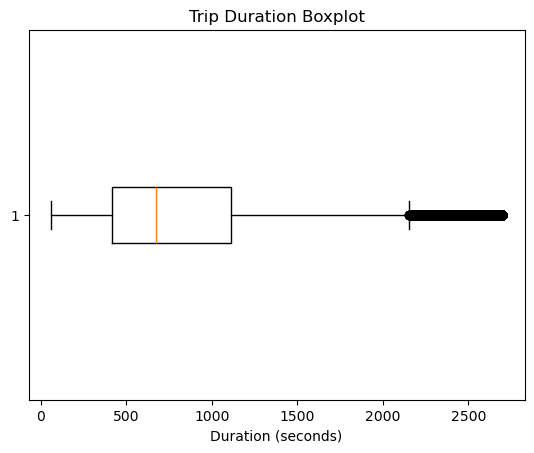

In [265]:
# Plotting box plot 
import matplotlib.pyplot as plt

plt.boxplot(df['trip_duration'].dropna(), vert=False)
plt.title('Trip Duration Boxplot')
plt.xlabel('Duration (seconds)')
plt.show()

In [266]:
# Detecting Outliers using IQR
# Step 1: Calculate Q1 and Q3
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 2061


##### The number of outliers identified is < 5%, therefore I will exclude the anomalies from my data set. However, i will create a copy of my data set to ensure i do not permanently remove any data.

In [267]:
# Copy data set
df_full = df.copy()

In [268]:
# Create a cleaned version of data (no trip_duration outliers)
df_clean = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

##### I will store my outliers seperately for future analysis (if necessary)

In [269]:
# Storing outliers seperately 
df_outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]

In [270]:
# Check data set
df_clean.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
5,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False


In [271]:
# Check shape
df_clean.shape

(47939, 19)

In [272]:
# Descriptive statistics for numeric columns
df_clean.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000,47939.000000
mean,17614.241849,14.138426,439.992407,40.734208,-73.991138,439.970296,40.733915,-73.991430,765.991072,1975.975990
std,1673.432504,4.882258,348.471008,0.019714,0.012467,349.995966,0.019657,0.012459,460.861609,10.375273
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000
25%,16188.000000,10.000000,304.000000,40.720434,-74.000271,304.000000,40.720434,-74.001547,408.000000,1970.000000
50%,17584.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735354,-73.991255,648.000000,1978.000000
75%,19014.000000,18.000000,484.000000,40.749718,-73.981948,483.000000,40.749013,-73.982681,1038.000000,1983.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2154.000000,1997.000000


##### Outliers have been detected in the birth_year column. The minimum is 1889, the maxiumum is 1997, and the mean is 1975.

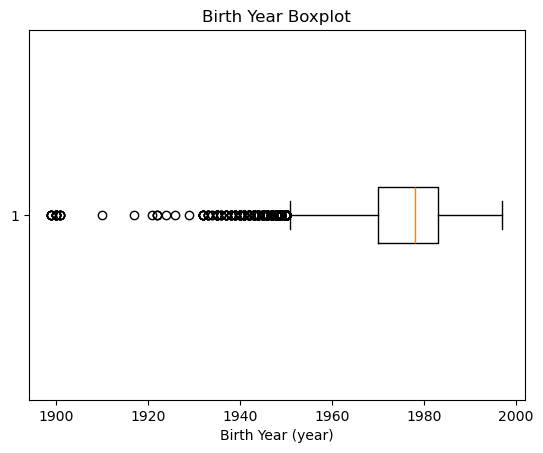

In [273]:
# Plotting box plot 
plt.boxplot(df_clean['birth_year'].dropna(), vert=False)
plt.title('Birth Year Boxplot')
plt.xlabel('Birth Year (year)')
plt.show()

In [274]:
# Detecting Outliers using IQR
# Step 1: Calculate Q1 and Q3 for birth_year
Q1 = df_clean['birth_year'].quantile(0.25)
Q3 = df_clean['birth_year'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
birth_year_outliers = df_clean[(df_clean['birth_year'] < lower_bound) | (df_clean['birth_year'] > upper_bound)]
print(f"Number of birth_year outliers: {len(birth_year_outliers)}")

# Step 4: Create a versioned copy of the cleaned dataset (v2 = after birth_year cleaning)
df_clean_v2 = df_clean[(df_clean['birth_year'] >= lower_bound) & (df_clean['birth_year'] <= upper_bound)].copy()

# Step 5: Store the birth year outliers separately
df_birth_year_outliers = birth_year_outliers.copy()

Number of birth_year outliers: 876


##### Next, I want to apply a logical age filter. This data is from 2013, although it was recently updated (5 years ago). Nevertheless, taking the year 2013 into account, and assuming that the youngest rider is 16 years old and the oldest is 80, I will filter the data accordingly. 

In [275]:
# Step 1: Define valid birth year range (based on dataset year 2013)
min_birth_year = 1933  # Max age 80
max_birth_year = 1997  # Min age 16 

# Step 2: Apply logical age filter to df_clean_v2
df_clean_v3 = df_clean_v2[(df_clean_v2['birth_year'] >= min_birth_year) & (df_clean_v2['birth_year'] <= max_birth_year)].copy()

# Step 3: Store logically invalid birth years separately
df_birth_year_invalid_logical = df_clean_v2[(df_clean_v2['birth_year'] < min_birth_year) | (df_clean_v2['birth_year'] > max_birth_year)].copy()

# Step 4: Print summary
print(f"Cleaned dataset after logical age filter: {len(df_clean_v3)} entries")
print(f"Entries removed due to logical age filter: {len(df_birth_year_invalid_logical)}")

Cleaned dataset after logical age filter: 47063 entries
Entries removed due to logical age filter: 0


In [276]:
# Check data
df_clean_v3.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
5,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False


In [277]:
# Check shape
df_clean_v3.shape

(47063, 19)

In [278]:
# Descriptive statistics for numeric columns
df_clean_v3.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year
count,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000,47063.000000
mean,17613.779976,14.150437,440.082145,40.734194,-73.991118,440.266154,40.733917,-73.991414,765.397000,1976.554448
std,1672.061331,4.889882,348.228480,0.019745,0.012468,350.089221,0.019684,0.012468,460.729103,9.487304
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1951.000000
25%,16188.000000,10.000000,304.000000,40.720434,-74.000271,304.000000,40.720434,-74.001547,407.000000,1971.000000
50%,17579.000000,15.000000,402.000000,40.735877,-73.990765,402.000000,40.735439,-73.991255,647.000000,1978.000000
75%,19013.000000,18.000000,484.000000,40.749718,-73.981948,483.000000,40.749013,-73.982681,1038.000000,1984.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2154.000000,1997.000000


#### 09. Export Data as .pkl

In [279]:
# Export df_clean_v3 as a pickle file
df_clean_v3.to_pickle('cleaned_bike_data.pkl')